In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import plotly
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles

# Data cleaning

In [ ]:
import os

In [ ]:
wish=pd.read_csv("/content/summer-products-with-rating-and-performance_2020-08.csv")
wish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [ ]:
wish.drop(columns=['title_orig','merchant_name','merchant_info_subtitle','merchant_id',
                   'merchant_profile_picture','product_url','product_picture','product_id','crawl_month','theme','currency_buyer'],inplace=True)
wish.isnull().sum()

title                              0
price                              0
retail_price                       0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
has_urgency_banner              1100
urgency_text                    1100
o

In [ ]:
nan_replace={'has_urgency_banner':0,'urgency_text':'N/A','origin_country':'unknown','product_color':'unknown'}
wish.fillna(nan_replace,inplace=True)
wish_cln=wish.dropna()
wish_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1514 entries, 0 to 1572
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1514 non-null   object 
 1   price                         1514 non-null   float64
 2   retail_price                  1514 non-null   int64  
 3   units_sold                    1514 non-null   int64  
 4   uses_ad_boosts                1514 non-null   int64  
 5   rating                        1514 non-null   float64
 6   rating_count                  1514 non-null   int64  
 7   rating_five_count             1514 non-null   float64
 8   rating_four_count             1514 non-null   float64
 9   rating_three_count            1514 non-null   float64
 10  rating_two_count              1514 non-null   float64
 11  rating_one_count              1514 non-null   float64
 12  badges_count                  1514 non-null   int64  
 13  bad

In [ ]:
price_cmp=wish_cln[['price','retail_price','units_sold']]
price_cmp.describe()
price_cmp.head()

,price,retail_price,units_sold
0,16.00,14,100
1,8.00,22,20000
2,8.00,43,100
3,8.00,8,5000
4,2.72,3,100


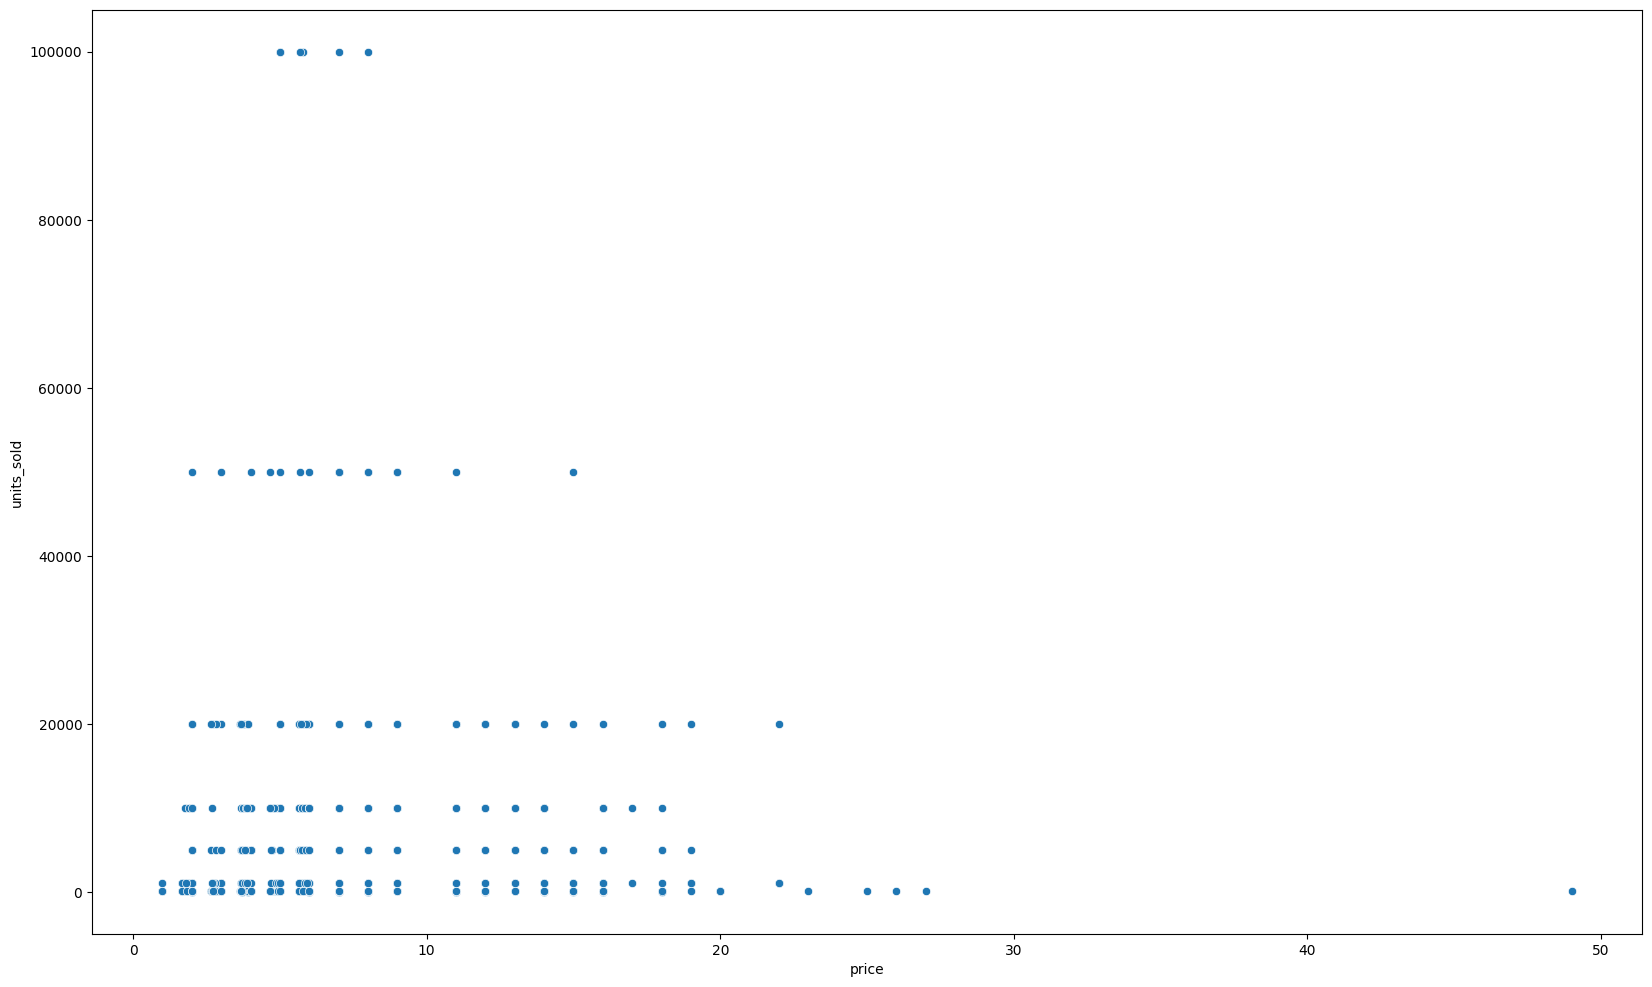

In [ ]:
plt.figure(figsize=(20,12))
sns.scatterplot(data=wish_cln,
               x="price",
               y='units_sold')
plt.show()

In [ ]:
trace1 = go.Violin(y=price_cmp["price"],name='Price')
trace2 = go.Violin(y=price_cmp["retail_price"],name='Retail price')
fig=go.Figure([trace1, trace2])
fig.update_layout(
title='Comparison between price and retail price',
yaxis_title='Price(EUR)')
fig.show()

In [ ]:
country_price=wish_cln[['units_sold','origin_country']]
country_mean_price=country_price.groupby('origin_country')['units_sold'].mean().reset_index()
country_mean_price.rename(columns={'units_sold': 'units_sold_mean'},inplace=True)


In [ ]:
to_codes={'CN':'CHN',
         'GB':'GBR',
         'SG':'SGP',
         'US':'USA',
         'VE':'VEN'}
country_mean_price['code']=country_mean_price['origin_country'].map(to_codes)
country_mean_price

,origin_country,units_sold_mean,code
0,CN,4513.967786,CHN
1,GB,1000.000000,GBR
2,SG,10050.000000,SGP
3,US,1405.161290,USA
4,VE,70.000000,VEN
5,unknown,5556.250000,NaN


In [ ]:
country_sales_map=px.choropleth(country_mean_price,
                       color='units_sold_mean',
                       locations='code',
                       hover_name='code',
                       color_continuous_scale=px.colors.sequential.Plasma,
                       title='Sales verses origin country')
country_sales_map.show()

In [ ]:
color_sale=wish_cln.groupby('product_color')['units_sold'].sum()
color_sale=color_sale.reset_index().sort_values(by='units_sold',ascending=False)
color_sale

,product_color,units_sold
13,black,1581190
89,white,1060797
40,grey,436170
86,unknown,347350
76,purple,338450
...,...,...
25,camel,100
68,orange & camouflage,100
83,silver,100
77,rainbow,50


In [ ]:
top_10_color_sale=color_sale.head(10)

In [ ]:
fig=px.bar(data_frame=top_10_color_sale,
      x='product_color',
      y='units_sold')
fig.update_layout(title='Top 10 color sales')
fig.show()

In [ ]:
rating_cols=['rating_count','rating_five_count','rating_four_count',
             'rating_three_count','rating_two_count','rating_one_count']
ratings_data=wish_cln[rating_cols+['uses_ad_boosts']]

ratings_data.groupby('uses_ad_boosts').describe()

rating_count                                             \
                      count        mean          std  min   25%    50%   
uses_ad_boosts                                                           
0                     858.0  987.363636  2150.592051  1.0  29.0  216.5   
1                     656.0  811.807927  1801.185027  1.0  27.0  127.0   

                                rating_five_count              ...  \
                   75%      max             count        mean  ...   
uses_ad_boosts                                                 ...   
0               884.75  20744.0             858.0  477.244755  ...   
1               836.25  17980.0             656.0  391.910061  ...   

               rating_two_count         rating_one_count              \
                            75%     max            count        mean   
uses_ad_boosts                                                         
0                          65.5  2003.0            858.0  102.503497   
1                          59.0  1410.0            656.0   85.602134   

                                                            
                       std  min  25%   50%     75%     max  
uses_ad_boosts                                              
0               230.148069  0.0  4.0  23.0  104.00  2789.0  
1               189.946329  0.0  3.0  16.0   83.25  1846.0  

[2 rows x 48 columns]

In [ ]:
fig = go.Figure()
for col in rating_cols:
    fig.add_trace(go.Box(x=ratings_data['uses_ad_boosts'],
                         y=ratings_data[col],
                         name=col,
                         boxmean=True,
                         boxpoints=False))
fig.update_traces(quartilemethod="exclusive")
fig.update_layout(boxmode='group',
                  title='Relations between ad boosts and rating',
                  xaxis = dict(
                  tickvals = [0,1],
                  ticktext = ['Without add boosts','With add boosts']))
fig.show()

<Figure size 2000x1200 with 0 Axes>

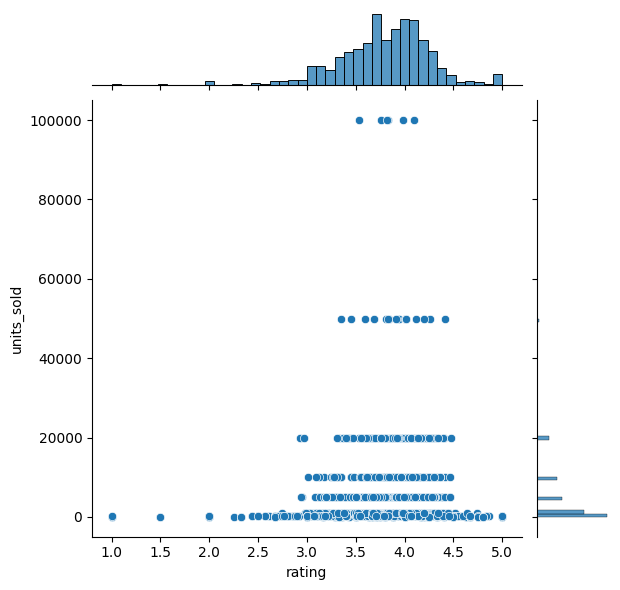

In [ ]:
cmp_table=wish_cln[['units_sold','rating','rating_count']]
plt.figure(figsize=(20,12))
sns.jointplot(data=cmp_table,
             x='rating',
             y='units_sold')
plt.show()

In [ ]:
line=go.Scatter3d(x=cmp_table['rating'],
                  y=cmp_table['rating_count'],
                  z=cmp_table['units_sold'])
fig=go.Figure(line)
fig.update_layout(title='Impact of rating and rating count to sales',
                  height = 1000,
                  width = 1000,
                  scene = dict(
                  xaxis_title='rating',
                  yaxis_title='rating_count',
                  zaxis_title='units_sold'))
fig.show()

In [ ]:
index,name=wish_cln['shipping_option_name'].factorize()
wish_cln['shipping_option_index']=index

<ipython-input-23-dc2bcc7b2b8d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



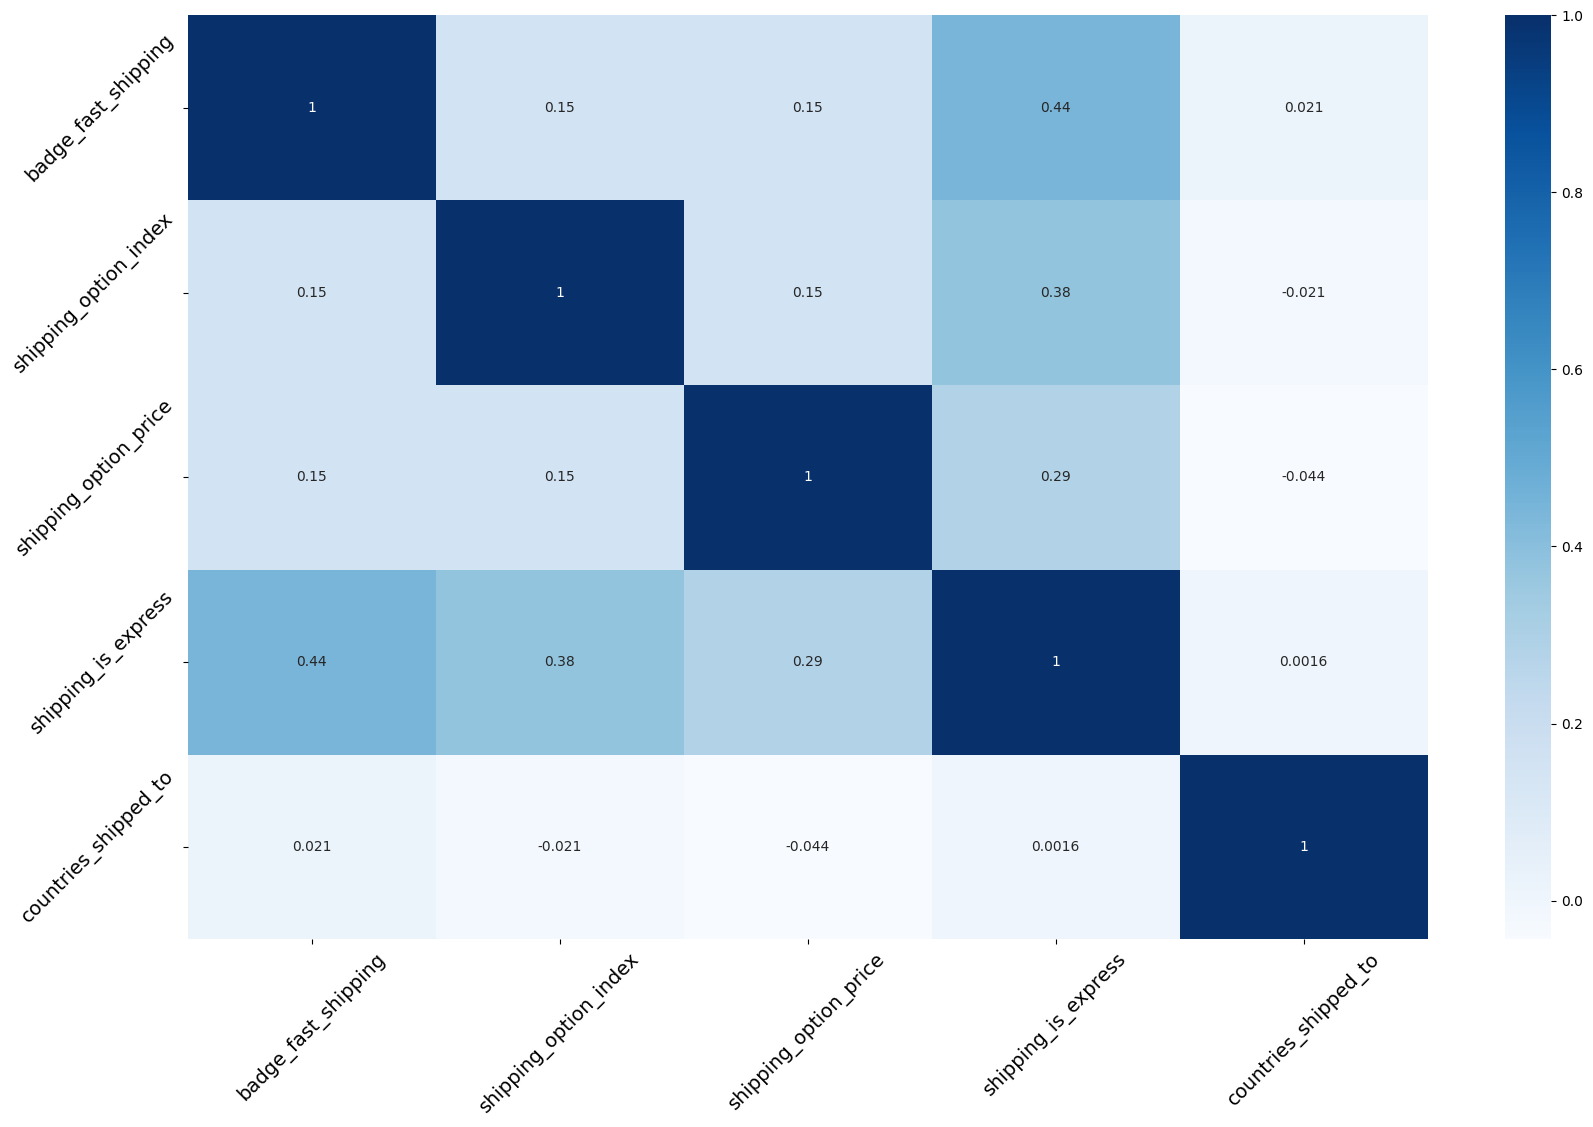

In [ ]:
corr_map=wish_cln[['badge_fast_shipping','shipping_option_index','shipping_option_price','shipping_is_express','countries_shipped_to']]
corr_map=corr_map.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr_map,annot=True,cmap='Blues')
plt.xticks(rotation=45,fontsize=14)
plt.yticks(rotation=45,fontsize=14)
plt.show()

# Tags encoding

In [ ]:
from wordcloud import WordCloud

tags_for_count=[]

for x in wish_cln['tags']:
    for word in str(x).split(sep=','):
        word=word.lower()
        tags_for_count.append(word)
tags_for_count

['summer',
 'fashion',
 'womenunderwearsuit',
 'printedpajamasset',
 'womencasualshort',
 "women's fashion",
 'flamingo',
 'loungewearset',
 'casual',
 'shirt',
 'casualsleepwear',
 'shorts',
 'flamingotshirt',
 'elastic',
 'vintage',
 'tops',
 'tshirtandshortsset',
 'women',
 'sleepwear',
 'print',
 'womenpajamasset',
 'womennightwear',
 'pajamas',
 'womensleepwearset',
 'mini',
 'womens dresses',
 'summer',
 'patchwork',
 'fashion dress',
 'dress',
 'mini dress',
 "women's fashion",
 'women s clothing',
 'backless',
 'party',
 'summer dresses',
 'sleeveless',
 'sexy',
 'casual',
 'summer',
 'cardigan',
 'women beachwear',
 'chiffon',
 'sexy women',
 'coat',
 'summercardigan',
 'openfront',
 'short sleeves',
 'swimsuit',
 "women's fashion",
 'leaf',
 'green',
 'printed',
 'spring',
 'longcardigan',
 'women',
 'beach',
 'kimono',
 'summer',
 'shorts',
 'cotton',
 'cotton t shirt',
 'sleeve',
 'printedletterstop',
 'clothing',
 'tops',
 'necks',
 'short sleeves',
 "women's fashion",
 'w

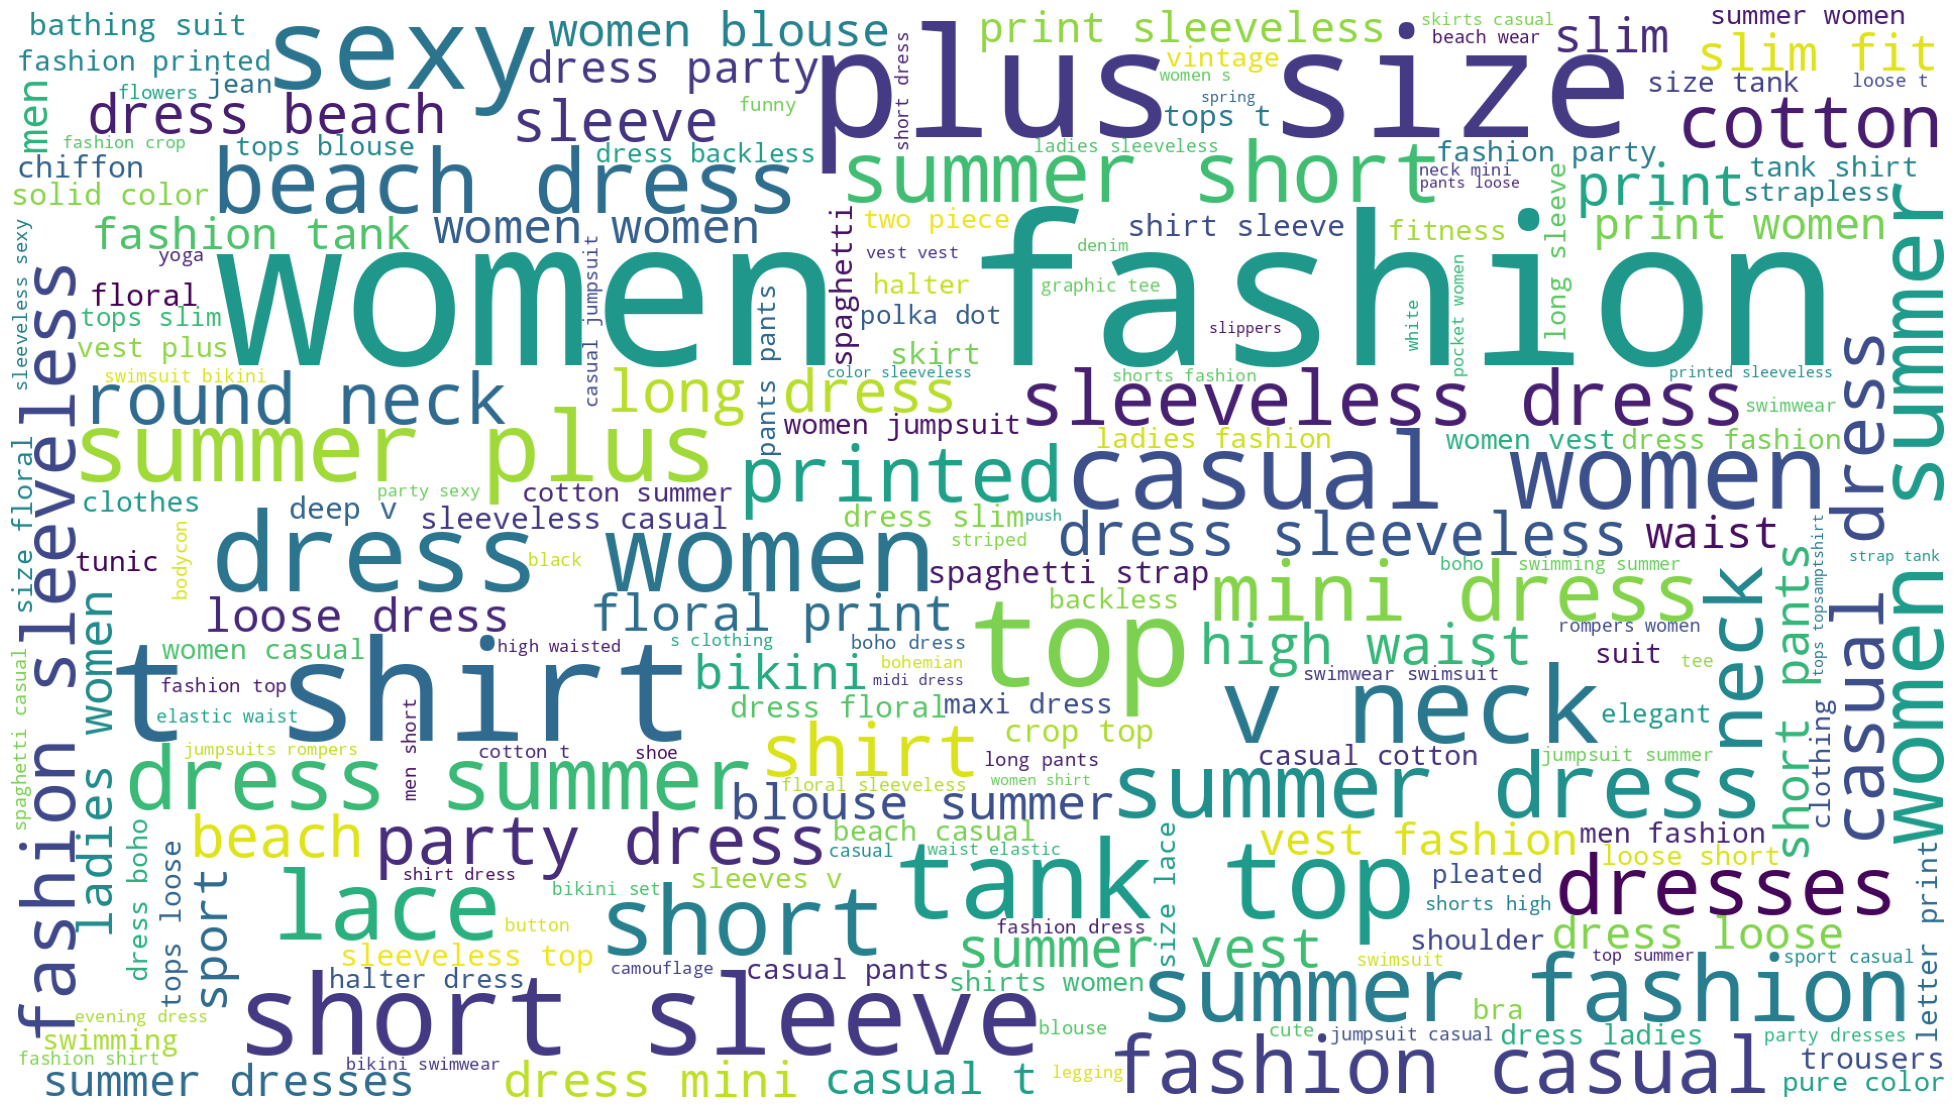

In [ ]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(tags_for_count))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
merchant_sales=wish_cln[['merchant_title','merchant_rating_count',
                         'merchant_rating','merchant_has_profile_picture','units_sold']]

In [ ]:
merchant_sales['merchant_rating'].max()

4.577519379844961

In [ ]:
merchant_sales['merchant_rating'].min()

In [ ]:
bins1 = [2.9, 3.5, 4.0, np.inf]
cats1 = pd.cut(merchant_sales['merchant_rating'],bins1)
merchant_sales['merchant_raing_cats']=cats1

In [ ]:
bins2 = [0, 250000, 900000, np.inf]
cats2 = pd.cut(merchant_sales['merchant_rating_count'],bins2)
merchant_sales['raing_count_cats']=cats2

In [ ]:
merchant_top_50 = merchant_sales.groupby(['merchant_has_profile_picture','merchant_title','merchant_raing_cats','raing_count_cats'])['units_sold'].sum().nlargest(50).reset_index()

In [ ]:
fig = px.bar(data_frame = merchant_top_50,
           x = 'merchant_title',
           y = 'units_sold',
           color = 'merchant_raing_cats',
           facet_col = 'merchant_has_profile_picture',
           facet_row = 'raing_count_cats',
           width = 1200, height = 800)
fig.update_layout(title = 'Top 50 merchants')
fig.show()

In [ ]:
color_sale = wish_cln_copy.groupby('product_color')['units_sold'].sum()
color_sale = color_sale.reset_index().sort_values(by = 'units_sold',ascending=False)
top_10_color_sale = color_sale.head(10)
top_10 = list(top_10_color_sale['product_color'])

In [ ]:
wish_cln_copy['product_color'][~wish_cln_copy['product_color'].isin(top_10)]='other

In [ ]:
wish_cln_copy['product_color'].unique()

In [ ]:
f = lambda x: len(x)
wish_cln_copy['tags_num'] = wish_cln_copy['tags'].apply(f)
wish_cln_copy['rating_count'].hist()

In [ ]:
sns.scatterplot(data=wish_cln_copy,x='rating_count',y='units_sold')

In [ ]:
wish_cln_copy["rating_count_cat"] = pd.cut(wish_cln_copy["rating_count"],
                               bins=[0, 300, 1000, np.inf],
                               labels=[1, 2, 3])

In [ ]:
wish_cln_copy["rating_count_cat"].value_counts()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(wish_cln_copy, wish_cln_copy["rating_count_cat"]):
    strat_train_set = wish_cln_copy.iloc[train_index]
    strat_test_set = wish_cln_copy.iloc[test_index]

In [ ]:
strat_test_set["rating_count_cat"].value_counts() / len(strat_test_set)

In [ ]:
strat_train_set["rating_count_cat"].value_counts() / len(strat_train_set)

In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("rating_count_cat", axis=1, inplace=True)

In [ ]:
wish_exp = strat_train_set.copy()
corr_matrix = wish_exp.corr()
corr_matrix["units_sold"].sort_values(ascending=False)

In [ ]:
wish_exp['rating_three_count_prop']=wish_exp['rating_three_count']/wish_exp['rating_count']
wish_exp['rating_four_count_prop']=wish_exp['rating_four_count']/wish_exp['rating_count']
wish_exp['rating_five_count_prop']=wish_exp['rating_five_count']/wish_exp['rating_count']
wish_exp['rating_two_count_prop']=wish_exp['rating_two_count']/wish_exp['rating_count']
wish_exp['rating_one_count_prop']=wish_exp['rating_one_count']/wish_exp['rating_count']

In [ ]:
wish_exp['drops']=wish_exp["retail_price"]-wish_exp["price"]
corr_matrix = wish_exp.corr()
corr_matrix["units_sold"].sort_values(ascending=False)

# Prepare the data for Machine Learning algorithms

In [ ]:
wish = strat_train_set.drop("units_sold", axis=1) # drop labels for training set
wish_labels = strat_train_set["units_sold"].copy()
wish.columns

In [ ]:
wish_num = wish.drop(['title','tags','product_variation_size_id','product_variation_inventory',
                      'inventory_total','product_color','origin_country','urgency_text',
                      'shipping_option_name','badge_fast_shipping','shipping_option_index',
                      'merchant_title','countries_shipped_to'], axis=1)

In [ ]:
wish_num.head()

,price,retail_price,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,shipping_option_price,shipping_is_express,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,tags_num
262,11.0,10,0,3.29,38,13.0,5.0,8.0,4.0,8.0,0,0,0,3,0,1.0,168,3.732143,0,162
815,6.0,6,0,4.18,352,211.0,59.0,40.0,17.0,25.0,0,0,0,2,0,0.0,17738,3.935900,0,168
897,8.0,20,0,3.12,341,106.0,45.0,62.0,39.0,89.0,0,0,0,2,0,1.0,7858,3.953169,0,172
1416,8.0,8,1,3.98,1612,777.0,367.0,241.0,112.0,115.0,0,0,0,3,0,1.0,35262,3.939482,0,225
1241,9.0,65,1,3.70,162,70.0,32.0,26.0,10.0,24.0,0,0,0,3,0,1.0,3373,3.964720,0,154


In [ ]:
wish_cat = wish[['product_color','origin_country','shipping_option_name']]
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
wish_cat_1hot = cat_encoder.fit_transform(wish_cat)
wish_cat_1hot

In [ ]:
cat_encoder.categories_

In [ ]:
from sklearn.preprocessing import FunctionTransformer

one_ix, two_ix, three_ix, four_ix, five_ix, rating_count_ix, retail_price_ix, price_ix= [
    list(wish.columns).index(col)
    for col in ("rating_one_count", "rating_two_count",
                "rating_three_count", "rating_four_count",
               'rating_five_count', 'rating_count','retail_price','price')]
def add_extra_features(X):
    rating_one_count_prop = X[:,one_ix]/ X[:,rating_count_ix]
    rating_two_count_prop = X[:,two_ix]/ X[:,rating_count_ix]
    rating_three_count_prop = X[:,three_ix]/ X[:,rating_count_ix]
    rating_four_count_prop = X[:,four_ix]/ X[:,rating_count_ix]
    rating_five_count_prop = X[:,five_ix]/ X[:,rating_count_ix]
    drops = X[:,retail_price_ix] - X[:,price_ix]
    return np.c_[X, rating_one_count_prop, rating_two_count_prop,
                 rating_three_count_prop,rating_four_count_prop,
                 rating_five_count_prop,drops]

attr_adder = FunctionTransformer(add_extra_features, validate=False)
wish_extra_attribs = attr_adder.transform(wish.values)

In [ ]:
attr_adder

In [ ]:
wish_extra_attribs = pd.DataFrame(
    wish_extra_attribs,
    columns = list(wish.columns)+["rating_one_count_prop", "rating_two_count_prop",
                               'rating_three_count_prop','rating_four_count_prop',
                               'rating_five_count_prop','drops'],
    index = wish.index)
wish_extra_attribs.head()

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False))])

wish_num_tr = num_pipeline.fit_transform(wish_num)

In [ ]:
wish_num_tr